In [11]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [12]:
import lightgbm as lgb

In [13]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

uploader = widgets.FileUpload()

def on_upload_change(change):
    for name, file_info in uploader.value.items():
        with open(name, 'wb') as f:
            f.write(file_info['content'])
        print(f'Saved {name}')

uploader.observe(on_upload_change, names='value')
display(uploader)


FileUpload(value=(), description='Upload')

In [14]:
cropdf = pd.read_csv("Crop_Recommendation.csv")
cropdf.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,Rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,Rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,Rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,Rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,Rice


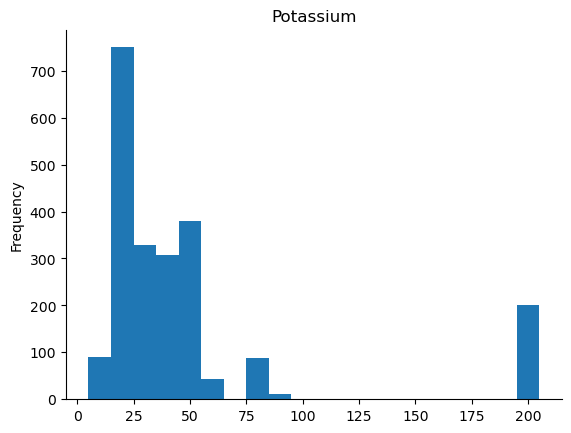

In [15]:
# @title Potassium

from matplotlib import pyplot as plt
cropdf['Potassium'].plot(kind='hist', bins=20, title='Potassium')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
cropdf.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [17]:
cropdf.shape

(2200, 8)

In [18]:
cropdf.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [19]:
cropdf.isnull().any()

Nitrogen       False
Phosphorus     False
Potassium      False
Temperature    False
Humidity       False
pH_Value       False
Rainfall       False
Crop           False
dtype: bool

In [20]:
print(cropdf.columns)
print("Number of various crops: ", len(cropdf['Crop'].unique()))
print("List of crops: ", cropdf['Crop'].unique())


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
Number of various crops:  22
List of crops:  ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


In [21]:
# Display column names to confirm the correct column name
print(cropdf.columns)

# If the correct column name for crops is not 'label', find the right one
# Let's assume it's 'Crop' based on earlier information
try:
    crop_counts = cropdf['Crop'].value_counts()
    print(crop_counts)
except KeyError:
    print("The column 'Crop' does not exist. Please check the column names again.")


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64


In [22]:
# Display column names to confirm the correct column name
print(cropdf.columns)

# Assuming the correct column name for the crop label is 'Crop'
try:
    crop_summary = pd.pivot_table(cropdf, index=['Crop'], aggfunc='mean')
    print(crop_summary.head())
except KeyError:
    print("The column 'Crop' does not exist. Please check the column names again.")


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
            Humidity  Nitrogen  Phosphorus  Potassium    Rainfall  \
Crop                                                                
Apple      92.333383     20.80      134.22     199.89  112.654779   
Banana     80.358123    100.23       82.01      50.05  104.626980   
Blackgram  65.118426     40.02       67.47      19.24   67.884151   
ChickPea   16.860439     40.09       67.79      79.92   80.058977   
Coconut    94.844272     21.98       16.93      30.59  175.686646   

           Temperature  pH_Value  
Crop                              
Apple        22.630942  5.929663  
Banana       27.376798  5.983893  
Blackgram    29.973340  7.133952  
ChickPea     18.872847  7.336957  
Coconut      27.409892  5.976562  


In [23]:
crop_summary_N = crop_summary.sort_values(by='Nitrogen', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['Nitrogen'][0:10].sort_values().index,
    'x' : crop_summary_N['Nitrogen'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['Nitrogen'][-10:].index,
    'x' : crop_summary_N['Nitrogen'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (Nitrogen)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [24]:
crop_summary_P = crop_summary.sort_values(by='Phosphorus', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_P['Phosphorus'][0:10].sort_values().index,
    'x' : crop_summary_P['Phosphorus'][0:10].sort_values()
}

last = {
    'y' : crop_summary_P['Phosphorus'][-10:].index,
    'x' : crop_summary_P['Phosphorus'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least phosphorus required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Phosphorus ()",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [25]:
crop_summary_K = crop_summary.sort_values(by='Potassium', ascending=False)

fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_K['Potassium'][0:10].sort_values().index,
    'x' : crop_summary_K['Potassium'][0:10].sort_values()
}

last = {
    'y' : crop_summary_K['Potassium'][-10:].index,
    'x' : crop_summary_K['Potassium'][-10:]
}

fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),

    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Potassium (Potassium)",
                  plot_bgcolor='white',
                  font_size=12,
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [26]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Nitrogen'],
    name='Nitrogen',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Phosphorus'],
    name='Phosphorous',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['Potassium'],
    name='Potash',
    marker_color='crimson'
))

fig.update_layout(title="N, P, K values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [27]:
crop_scatter = cropdf[(cropdf['Crop']=='Rice') |
                      (cropdf['Crop']=='Jute') |
                      (cropdf['Crop']=='Cotton') |
                     (cropdf['Crop']=='Maize') |
                     (cropdf['Crop']=='Lentil')]

fig = px.scatter(crop_scatter, x="Temperature", y="Humidity", color="Crop", symbol="Crop")
fig.update_layout(plot_bgcolor='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [28]:
fig = px.bar(crop_summary, x=crop_summary.index, y=["Rainfall", "Temperature", "Humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

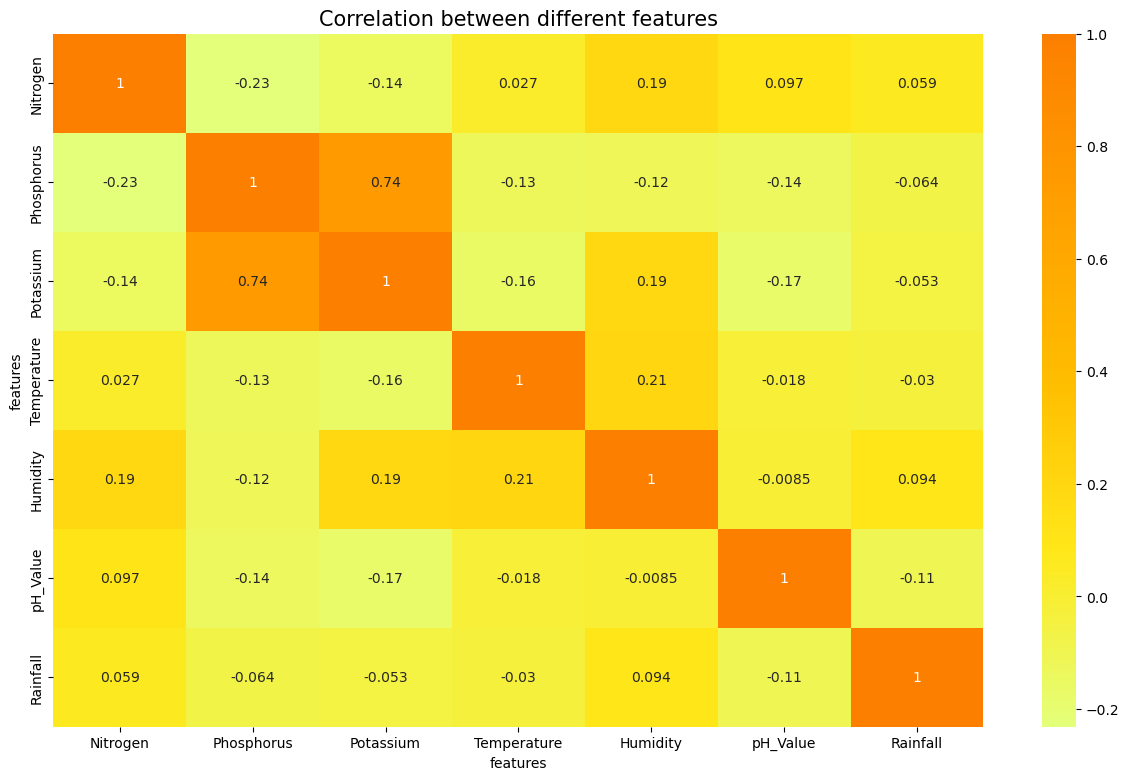

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = cropdf.select_dtypes(include=['number'])

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize=15, c='black')
plt.show()


In [30]:
X = cropdf.drop('Crop', axis=1)
y = cropdf['Crop']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [32]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.149883
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -3.076858
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.105431
[LightGBM] [Info] Start training from score -3.035473
[LightGBM] [Info] Start training from score -2.982829
[LightGBM] [Info] Start training from score -3.049078
[LightGBM] [Info] Start training from score -3.062872
[LightGBM] 

LGBMClassifier()

In [33]:
y_pred=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9894


In [35]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [36]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9894


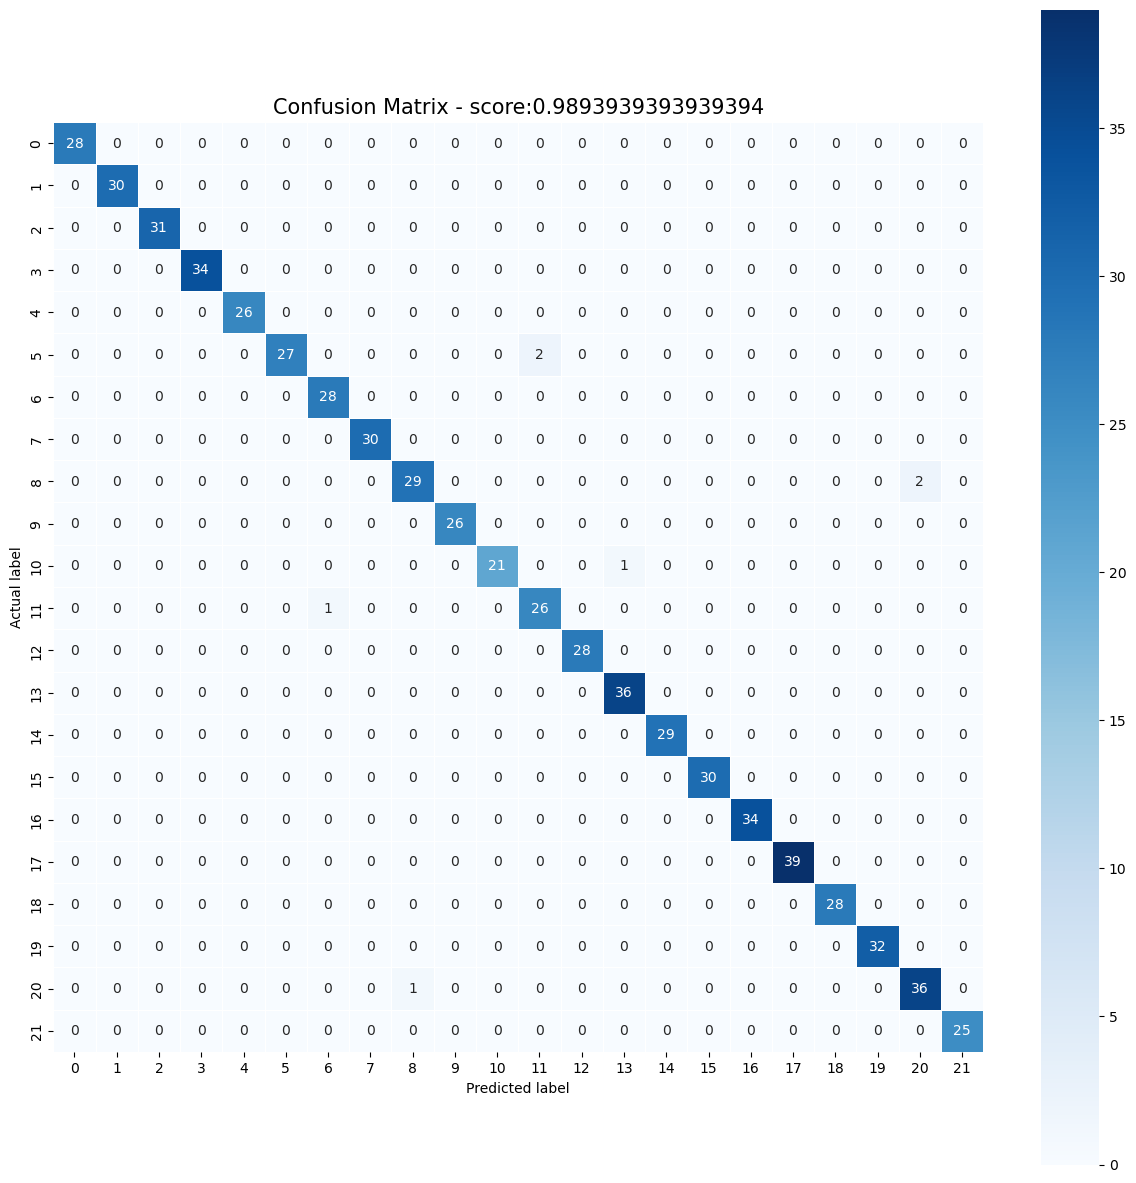

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        28
      Banana       1.00      1.00      1.00        30
   Blackgram       1.00      1.00      1.00        31
    ChickPea       1.00      1.00      1.00        34
     Coconut       1.00      1.00      1.00        26
      Coffee       1.00      0.93      0.96        29
      Cotton       0.97      1.00      0.98        28
      Grapes       1.00      1.00      1.00        30
        Jute       0.97      0.94      0.95        31
 KidneyBeans       1.00      1.00      1.00        26
      Lentil       1.00      0.95      0.98        22
       Maize       0.93      0.96      0.95        27
       Mango       1.00      1.00      1.00        28
   MothBeans       0.97      1.00      0.99        36
    MungBean       1.00      1.00      1.00        29
   Muskmelon       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        34
      Papaya       1.00    

In [39]:
newdata=model.predict([[98,37,29,32,76,7.4,186]])
newdata

array(['Jute'], dtype=object)

In [41]:
import pickle

# Assuming 'model' is your trained machine learning model
filename = 'crop_recommender.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)


In [43]:
# Check the column names in the DataFrame
crop_data = pd.read_csv('Crop_Recommendation.csv')
print(crop_data.columns)


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
